Modele SIR

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

We just rapidly sole the ODE with the data from the article and u3 = 1

In [95]:



##ODE
def F(X,t,u,t_):
    s,i,r = X
    return np.array([-beta*u(t,t_)*s*i, u(t,t_)*beta*s*i-mu*i,mu*i])



#resolution
def sir(X0,tf,N,u,t_):
    h = (tf)/N
    Y = [X0]
    y = X0
    T = [0]
    t = 0
    for k in range(N):
        y =  y + h*F(y,t,u,t_)
        t = t + h
        Y.append(y)
        T.append(t)
    return T,Y
    

Data

In [96]:
tf = 1000
N = 1000
I0 = 1000/(6.7*10**7)
X0 = [1-I0, I0, 0]
mu = 0.03115496987616957
beta = 0.19771420783844723
Sherd = mu/beta

In [104]:
def u(t,T):
    if t< T:
        return 0.5
    else:
        return 1

Result

In [105]:
    t_ = 500
    T,Y = sir(X0,tf,N,u,t_)
    ys = [y[0] for y in Y]
    yi = [y[1] for y in Y]
    yr = [y[2] for y in Y]

ys[len(ys)-1]

0.04868622684035647

plot

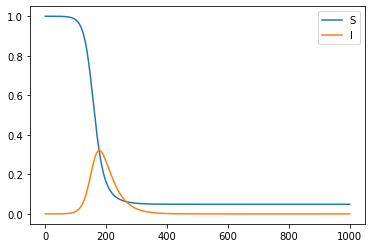

In [106]:
plt.plot(T,ys, label = "S")
plt.plot(T,yi, label = 'I')
#plt.plot(T, [Sherd for _ in T], label= 'Sherd')
plt.legend()
plt.show()